### import libraries

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import json

#### 1. Data Loading and Initial Exploration:
- Load the selected dataset into your preferred data analysis environment.
- Explore the structure of the dataset (number of rows and columns, data types, etc.).
- Examine the first few rows of the dataset to understand its contents.

In [2]:
# Add all in varable name
url_reviews_dic = '../Airbnb Data/Reviews_data_dictionary.csv'
url_reviews = '../Airbnb Data/reviews.csv'
url_listings_dic='../Airbnb Data/Listings_data_dictionary.csv'
url_listings = '../Airbnb Data/Listings.csv'
url_district_data = '../district_data/neighbourhood_district.json'

### Column Descriptions



#### columns of Reviews data and reviews dictionary

In [3]:
# Read the reviews dictionary 
df_reviews_dic = pd.read_csv(url_reviews_dic)
df_reviews_dic

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [4]:
# read the reviews data
df_reviews = pd.read_csv(url_reviews, parse_dates=['date'])
df_reviews.head(1)

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072


In [5]:
# Present the columns information 
df_reviews.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   listing_id   5373143 non-null  int64         
 1   review_id    5373143 non-null  int64         
 2   date         5373143 non-null  datetime64[ns]
 3   reviewer_id  5373143 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 164.0 MB


#### Listing data and listing dictionary

In [6]:
# Read the listing dictionary 
df_listing_dic = pd.read_csv(url_listings_dic)
df_listing_dic

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


### Reading listings data

In [7]:
# Read the listings data
df_listings = pd.read_csv(url_listings, encoding='latin',parse_dates=['host_since'], low_memory=False)
pd.options.display.max_columns = None
df_listings.head(1)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [8]:
# prestent the listing's columns information  
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### 2. Data Cleaning:
- Handle missing values appropriately (e.g., imputation, deletion, etc.).
- Check for and handle any duplicate entries.
- Convert categorical variables into the appropriate data type if necessary.


First we will rename the date column in review data to review_data

In [9]:
#Rename the date to review_date
df_reviews.rename(columns={'date': "review_date"}, inplace=True)

Checking duplicates and null values in review dataset 

In [10]:
# check any duplicated in reviews 
df_reviews.duplicated().sum() 

0

In [11]:
# check if there is any null values in review data
df_reviews.isnull().sum()

listing_id     0
review_id      0
review_date    0
reviewer_id    0
dtype: int64

Checking duplicates and null values in listing dataset 

In [12]:
#Check the duplicate in listings
df_listings.duplicated().sum()

0

In [13]:
#check if there is any null value in listing
df_listings.isnull().sum()

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

converting every columns to its proper type for example:

`instant_bookable` :

t **dtype:object** --> 1 **dtype:int**

In [14]:
# Convert the column to category type
df_listings['host_response_time'] = df_listings['host_response_time'].astype('category')

In [15]:
# Convert 'f' and 't' values to False and True
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].replace({'f': 0, 't': 1})
# Convert the column to boolean type
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].astype("Int64")

In [16]:
# Convert the column to int64 type
df_listings['host_total_listings_count'] = df_listings['host_total_listings_count'].astype("Int64")

In [17]:
# Replace 'f' and 't' values with False and True, respectively
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].replace({'f': 0, 't': 1})
# Convert the column to boolean type
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].astype("Int64")

In [18]:
# Replace 'f' and 't' values with False and True, respectively
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].replace({'f': 0, 't': 1})
# Convert the column to boolean type
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].astype("Int64")

In [19]:
## Convert the column to category type
df_listings['property_type'] = df_listings['property_type'].astype('category')

In [20]:
# Convert the column to category type
df_listings['room_type'] = df_listings['room_type'].astype('category')

In [21]:
# Convert the column to int64 type
df_listings['bedrooms'] = df_listings['bedrooms'].astype("Int64")

In [22]:
# Replace 'f' and 't' values with False and True, respectively
df_listings['instant_bookable'] = df_listings['instant_bookable'].replace({'f': 0, 't': 1})
# Convert the column to boolean type
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype("Int64")


In [23]:
df_listings.select_dtypes('category').describe()

,host_response_time,property_type,room_type
count,150930,279712,279712
unique,4,144,4
top,within an hour,Entire apartment,Entire place
freq,83464,138989,182005


In [24]:
df_listings.select_dtypes('number').describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.0,279547.0,279547.0,279547.0,279712.000000,279712.000000,279712.000000,250277.0,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000,279712.0
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,0.179766,24.581612,0.996723,0.719704,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364,0.413307
std,1.442576e+07,1.108570e+08,0.283744,0.289202,0.383993,284.041143,0.057149,0.449145,32.560343,73.081309,2.133379,1.15308,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625,0.492428
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.0,0.0,0.0,0.0,-34.264400,-99.339630,0.000000,1.0,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,0.0,1.0,1.0,0.0,-22.964390,-43.198040,2.000000,1.0,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.0
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,0.0,1.0,1.0,1.0,40.710785,2.382780,2.000000,1.0,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,0.0,4.0,1.0,1.0,41.908610,28.986730,4.000000,2.0,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0
max,4.834353e+07,3.901874e+08,1.000000,1.000000,1.0,7235.0,1.0,1.0,48.904910,151.339810,16.000000,50.0,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


Fill null district values. Using neighourhood and city columns to maping the district in get_district

##### ***no need to recall the function or write to a file since it has been stored in JSON file***

In [25]:
# def get_district(city, neighborhood):
#     # Initialize geocoder
#     geolocator = Nominatim(user_agent="district_locator")
#     # Construct the query string
#     location_query = f"{neighborhood}, {city}"
#     # Perform geocoding lookup
#     location = geolocator.geocode(location_query, exactly_one=True)
#     try:
#         return str(location).split(',')[1]
#     except:
#         return None    

In [26]:
# # Get the neighourhoods and cities of null district value then add in varable 
# neighbourhood_null_district = df_listings[df_listings['district'].isnull()][['neighbourhood','city']].drop_duplicates().values
# # Add all districts in dictionary with their neighbourhood
# district_dictionry = {i[0]: get_district(i[1],i[0]) for i in neighbourhood_null_district}

# Store the district_dictionary in a file
# with open(url_district_data, 'w') as f:
#     json.dump(district_dictionry, f)


In [27]:
# Read the district_dictionary from the file
with open(url_district_data, 'r') as f:
    district_dictionry = json.load(f)

In [28]:
# read from the dictionry
dict(list(district_dictionry.items())[:5])

{'Buttes-Montmartre': ' Quartier des Grandes-Carrières',
 'Elysee': ' Rue du Faubourg Saint-Honoré',
 'Vaugirard': ' Rue de Vaugirard',
 'Passy': ' Paris',
 'Temple': ' Rue de Turbigo'}

In [29]:
# fill the null district value dependence on neighourhood 
df_listings['district'].fillna(df_listings['neighbourhood'].map(district_dictionry),inplace=True)

In [30]:
# fill bedrooms columns by average of bedrooms columns  
df_listings['bedrooms'].fillna(round(df_listings['bedrooms'].mean()),inplace=True)

#### Drope some of unnecessery columns
Statistical operations before, cleaning some columns to know how to deal with them:- 

(columns)
- review_scores_rating            
- review_scores_accuracy        
- review_scores_cleanliness     
- review_scores_checkin          
- review_scores_communication     
- review_scores_location         
- review_scores_value

##### Before fill the missing data

In [31]:
# Calculate the origin variance before any fill  
print('The review of scores rating variace',df_listings['review_scores_rating'].var())
print('The review of scores accuracy variace',df_listings['review_scores_accuracy'].var())
print('The review of scores cleanliness  variace',df_listings['review_scores_cleanliness'].var())
print('The review of scores checkin  variace',df_listings['review_scores_checkin'].var())
print('The review of scores communication  variace',df_listings['review_scores_communication'].var())
print('The review of scores location  variace',df_listings['review_scores_location'].var())
print('The review of scores value  variace',df_listings['review_scores_value'].var())

The review of scores rating variace 101.4137108671774
The review of scores accuracy variace 0.9818389988463977
The review of scores cleanliness  variace 1.3134801553670081
The review of scores checkin  variace 0.7524414587129975
The review of scores communication  variace 0.7865627681577089
The review of scores location  variace 0.6942785669914633
The review of scores value  variace 1.0870661996716025


#### After fill tha missing data by mean

In [32]:
# Calculate the origin variance after fill  
df_listifs_rating =df_listings['review_scores_rating'].fillna(df_listings['review_scores_rating'].mean())
print('The review of scores rating',df_listifs_rating.var())
df_listifs_accuracy =df_listings['review_scores_accuracy'].fillna(df_listings['review_scores_accuracy'].mean())
print('The review of scores accuracy: ',df_listifs_accuracy.var())
df_listifs_cleaniness =df_listings['review_scores_cleanliness'].fillna(df_listings['review_scores_cleanliness'].mean())
print('The review of scores cleanliness: ',df_listifs_cleaniness.var())
df_listifs_checkin=df_listings['review_scores_checkin'].fillna(df_listings['review_scores_checkin'].mean())
print('The review of scores checkin: ',df_listifs_checkin.var())
df_listifs_communication =df_listings['review_scores_communication'].fillna(df_listings['review_scores_communication'].mean())
print('The review of scores communication: ',df_listifs_communication.var())
df_listifs_location =df_listings['review_scores_location'].fillna(df_listings['review_scores_location'].mean())
print('The review of scores location variace: ',df_listifs_location.var())
df_listifs_value =df_listings['review_scores_value'].fillna(df_listings['review_scores_value'].mean())
print('The review of scores value  variace: ',df_listifs_value.var())

The review of scores rating 68.27336157160062
The review of scores accuracy:  0.6599088634509105
The review of scores cleanliness:  0.8830353089283783
The review of scores checkin:  0.5055712780343715
The review of scores communication:  0.5287338643107923
The review of scores location variace:  0.4664812494521531
The review of scores value  variace:  0.7303538389245654


<Axes: >

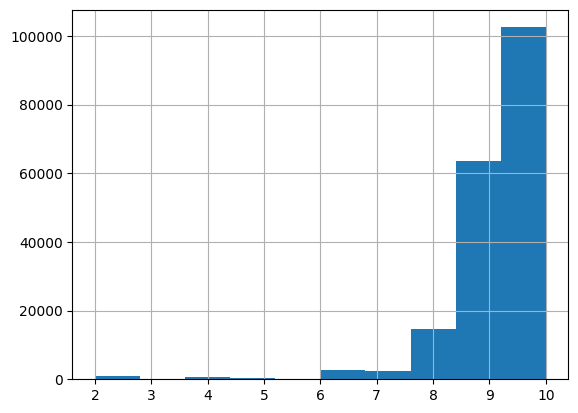

In [33]:
# Review scores value hist for origine data 
df_listings['review_scores_value'].hist()

<Axes: >

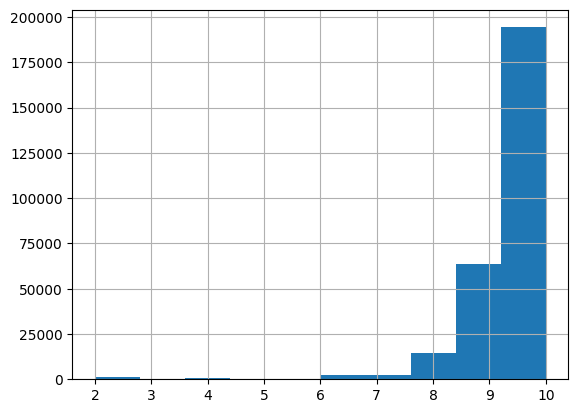

In [34]:
# review scores value hist for fillen data 
df_listifs_value.hist()

There is a significant difference between the two values in all columns then it's better to remove the columns rather than fill it.

In [35]:
#Drop unnecessary columns
df_listings.drop(columns=
                 ['host_response_time' ,
                   'host_response_rate', 
                   'host_acceptance_rate' ,
"review_scores_rating",
"review_scores_accuracy",
"review_scores_cleanliness",
"review_scores_checkin",
"review_scores_communication",
"review_scores_location",
"review_scores_value"] , inplace=True)

In [36]:
# Check null values in listing data 
df_listings.isnull().sum()

listing_id                       0
name                           175
host_id                          0
host_since                     165
host_location                  840
host_is_superhost              165
host_total_listings_count      165
host_has_profile_pic           165
host_identity_verified         165
neighbourhood                    0
district                     13702
city                             0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bedrooms                         0
amenities                        0
price                            0
minimum_nights                   0
maximum_nights                   0
instant_bookable                 0
dtype: int64

In [37]:
#Drop null rows 
df_listings.dropna(inplace=True)
df_listings.isnull().sum()

listing_id                   0
name                         0
host_id                      0
host_since                   0
host_location                0
host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
host_identity_verified       0
neighbourhood                0
district                     0
city                         0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bedrooms                     0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
instant_bookable             0
dtype: int64

#### Data cleaning summary

In [38]:
df_listings.head(1)

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",0,1,1,0,Buttes-Montmartre,Quartier des Grandes-Carrières,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,0


In [39]:
# prestent the listing's columns information  
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265029 entries, 0 to 279710
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   listing_id                 265029 non-null  int64         
 1   name                       265029 non-null  object        
 2   host_id                    265029 non-null  int64         
 3   host_since                 265029 non-null  datetime64[ns]
 4   host_location              265029 non-null  object        
 5   host_is_superhost          265029 non-null  Int64         
 6   host_total_listings_count  265029 non-null  Int64         
 7   host_has_profile_pic       265029 non-null  Int64         
 8   host_identity_verified     265029 non-null  Int64         
 9   neighbourhood              265029 non-null  object        
 10  district                   265029 non-null  object        
 11  city                       265029 non-null  object       

Merge the listing and reviews datasets togather

In [40]:
merge_data = df_listings.merge(df_reviews, left_on='listing_id', right_on='listing_id')


In [41]:
#drop any listing_id duplicated
# merge_date=merge_date[~(merge_date['listing_id'].duplicated())]
merge_data.count()

listing_id                   5038676
name                         5038676
host_id                      5038676
host_since                   5038676
host_location                5038676
host_is_superhost            5038676
host_total_listings_count    5038676
host_has_profile_pic         5038676
host_identity_verified       5038676
neighbourhood                5038676
district                     5038676
city                         5038676
latitude                     5038676
longitude                    5038676
property_type                5038676
room_type                    5038676
accommodates                 5038676
bedrooms                     5038676
amenities                    5038676
price                        5038676
minimum_nights               5038676
maximum_nights               5038676
instant_bookable             5038676
review_id                    5038676
review_date                  5038676
reviewer_id                  5038676
dtype: int64

In [42]:
merge_data.head(1)

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable,review_id,review_date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",0,1,1,0,Buttes-Montmartre,Quartier des Grandes-Carrières,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,0,173279221,2017-07-23,3501898


3. Exploratory Data Analysis:
- Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).
- Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).
- Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).
- Calculate summary statistics for relevant variables.


In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

<Axes: >

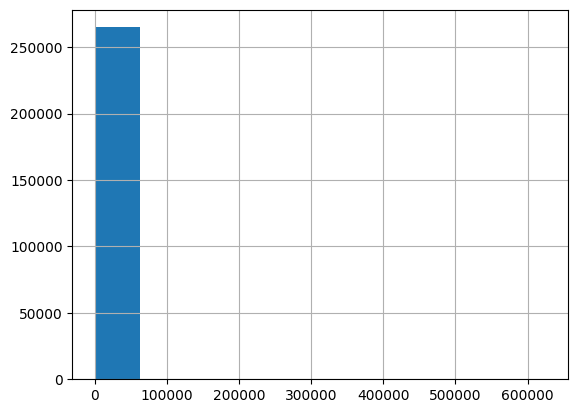

In [43]:
df_listings['price'].hist()

In [44]:
def log_scale_hist(column_name,dataset):
    log_binsize = 0.1
    bins =   10 ** np.arange(1, np.log10(dataset[column_name].max())+log_binsize, log_binsize)
    plt.hist(data = dataset, x = column_name, bins = bins)
    plt.title( f'{column_name} (log scale)')
    plt.xlabel(f'Log {column_name} ')
    plt.ylabel('Counts')
    plt.xscale('log')


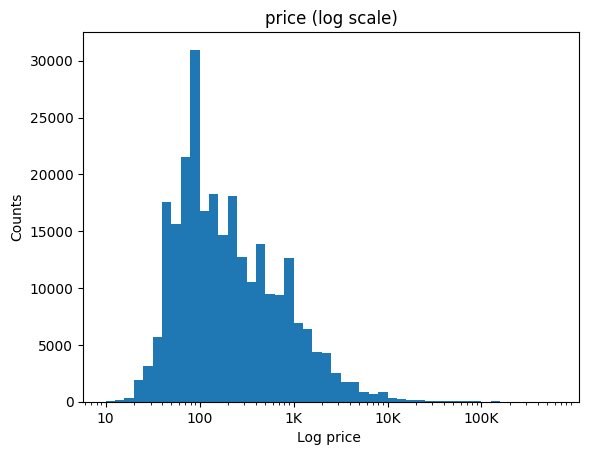

In [45]:
# because there's a long tail in the price ,so put it on a log scale instead
log_scale_hist('price',df_listings)
plt.xticks([10,100, 1000, 10000, 100000],[10,100,'1K','10K','100K'])
plt.show()


<Axes: >

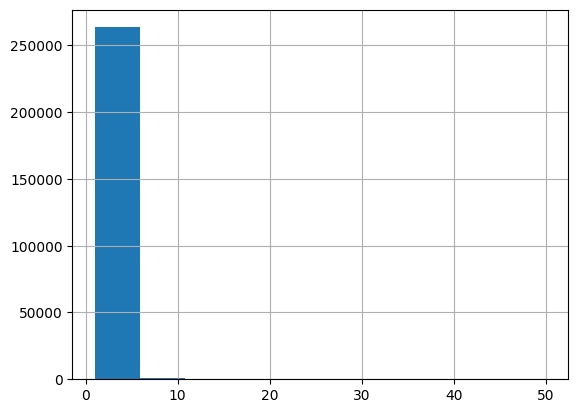

In [46]:
df_listings['bedrooms'].hist()

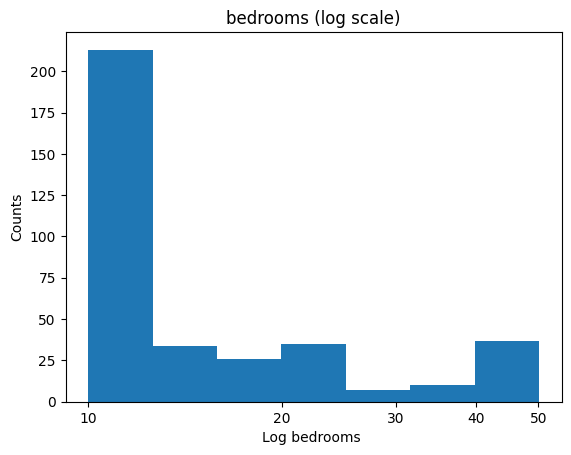

In [47]:
log_scale_hist('bedrooms',df_listings)
plt.xticks([ 10, 20, 30,40,50],[10, 20, 30,40,50])
plt.show()

<Axes: >

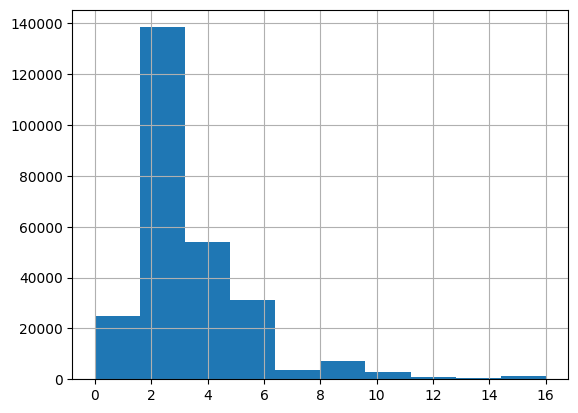

In [48]:
df_listings['accommodates'].hist()

<Axes: >

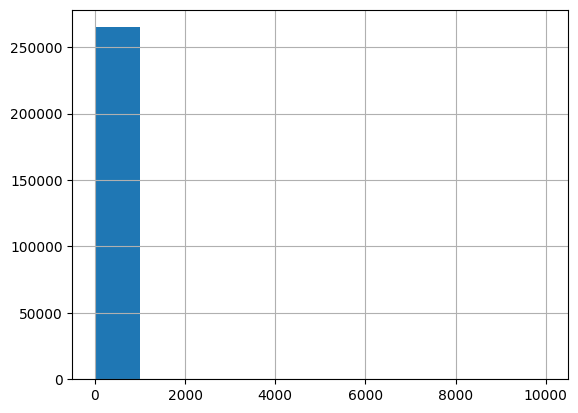

In [49]:
df_listings['minimum_nights'].hist()

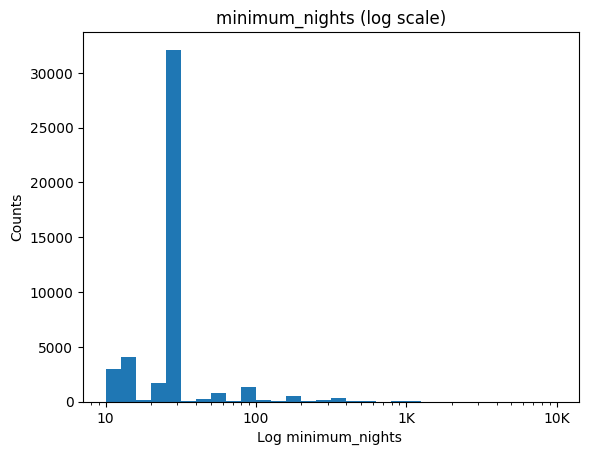

In [50]:
log_scale_hist('minimum_nights',df_listings)
plt.xticks([10,100, 1000, 10000],[10,100,'1K','10K'])
plt.show()

The are some of outrange value or unlogic value 


In [51]:
# check the count of unlogic values 
print('The mean value of minimum nights', df_listings['minimum_nights'].mean())
df_listings['minimum_nights'].mask(df_listings['minimum_nights'] > 10 , '+10', inplace=True)


The mean value of minimum nights 8.171181266955692


<Axes: xlabel='minimum_nights'>

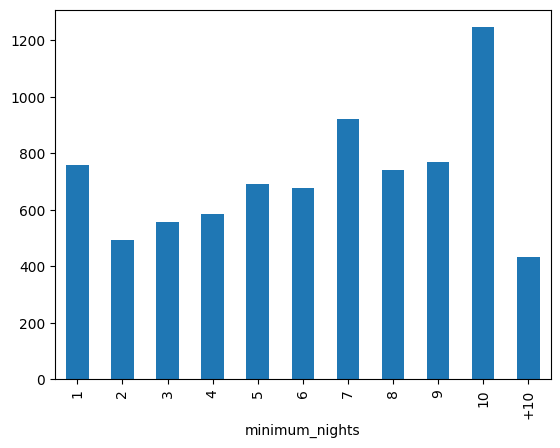

In [52]:
# plt.bar()
df_listings.groupby('minimum_nights').price.mean().plot.bar()

<Axes: title={'center': 'maximum_nights '}, xlabel='maximum_nights ', ylabel='Counts'>

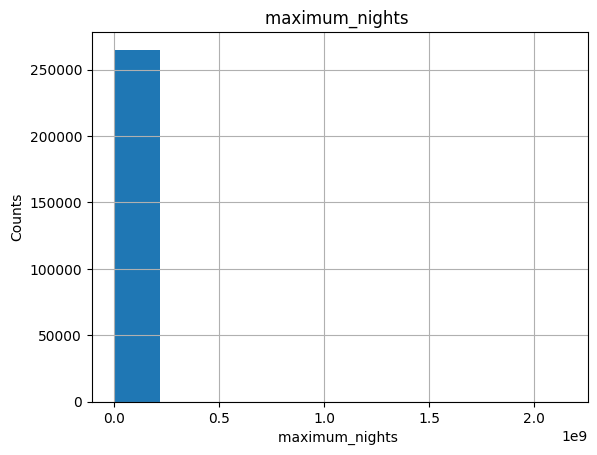

In [53]:
plt.title( 'maximum_nights ')
plt.xlabel('maximum_nights ')
plt.ylabel('Counts')
df_listings['maximum_nights'].hist()

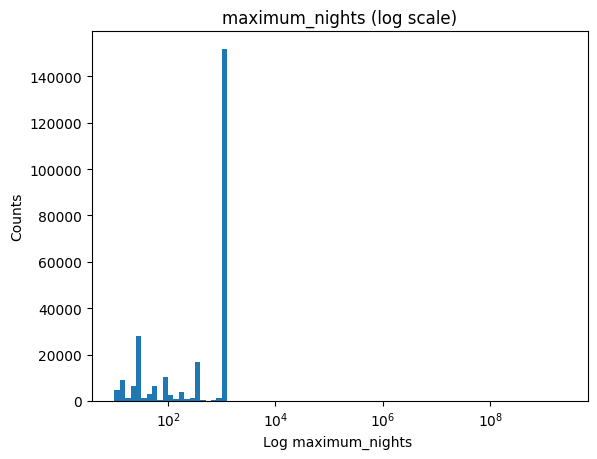

In [54]:
log_scale_hist('maximum_nights',df_listings)
# plt.xticks([10,100, 1000, 10000,100000],[10,100,'1K','10K','100K'])
plt.title( 'maximum_nights (log scale)')
plt.xlabel('Log maximum_nights ')
plt.ylabel('Counts')
plt.show()

In [55]:
print('The mean value of minimum nights', df_listings['maximum_nights'].mean())
df_listings['maximum_nights'].mask(df_listings['maximum_nights'] >  30000, '+∞', inplace=True)

The mean value of minimum nights 29048.521418410815


<Axes: xlabel='maximum_nights'>

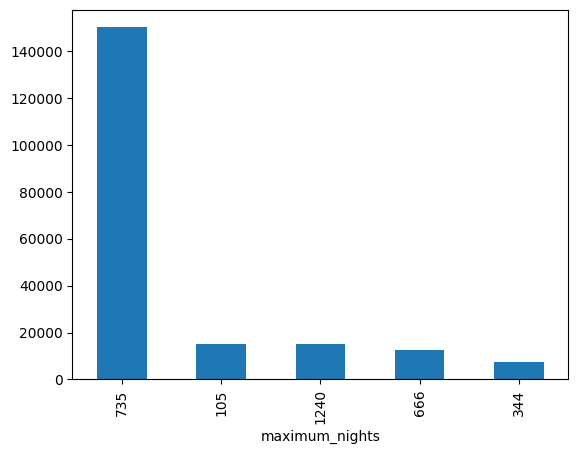

In [56]:
df_listings.groupby('maximum_nights').price.mean().sort_values(ascending=False)[:5].plot.bar()

In [57]:
df_listings['room_type'].value_counts()

room_type
Entire place    172169
Private room     82679
Hotel room        5495
Shared room       4686
Name: count, dtype: int64

<Axes: title={'center': 'Room type'}, xlabel='room_type', ylabel='Counts'>

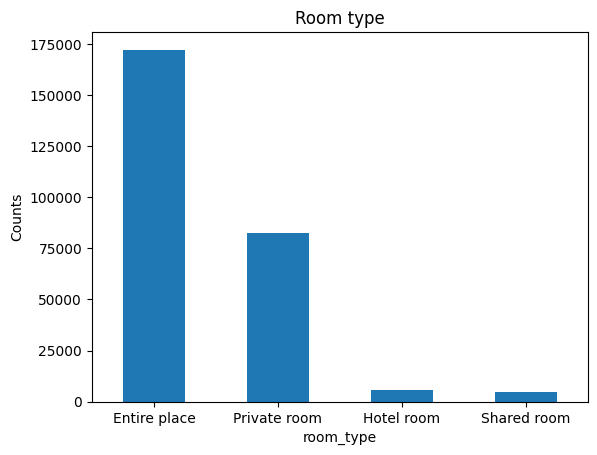

In [58]:
plt.title( 'Room type')
plt.xlabel('Room type ')
plt.ylabel('Counts')
df_listings['room_type'].value_counts().plot.bar(rot=0)

In [59]:
df_listings['city'].value_counts().head()

city
Paris             59845
New York          36883
Sydney            33332
Rio de Janeiro    26480
Istanbul          24407
Name: count, dtype: int64

<Axes: title={'center': 'Count city'}, xlabel='city', ylabel='Counts'>

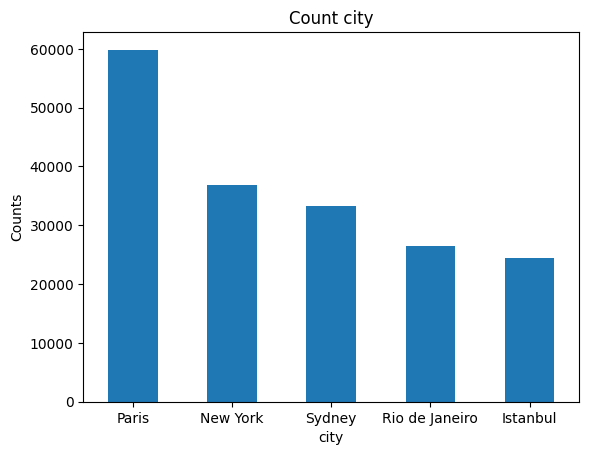

In [60]:
plt.title( 'Count city')
plt.xlabel('City ')
plt.ylabel('Counts')
df_listings['city'].value_counts()[:5].plot.bar(rot=0)

In [61]:
df_listings['neighbourhood'].value_counts()[:5]

neighbourhood
I Centro Storico     14842
Sydney                8040
Copacabana            7686
Cuauhtemoc            7617
Buttes-Montmartre     7213
Name: count, dtype: int64

<Axes: title={'center': 'neighborhoods'}, xlabel='neighbourhood', ylabel='Counts'>

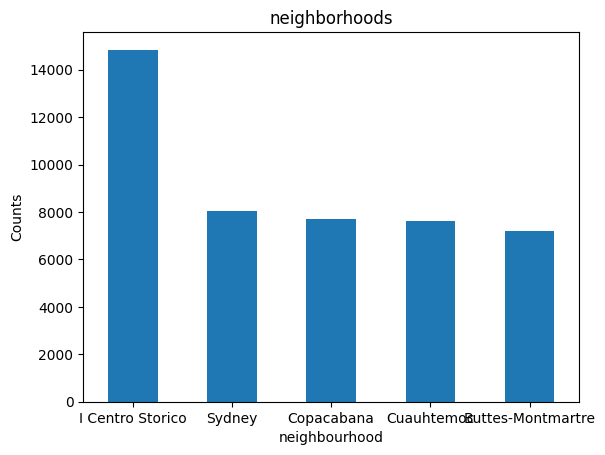

In [62]:
plt.title( 'neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Counts')
df_listings['neighbourhood'].value_counts()[:5].plot.bar(rot=0 )

In [63]:
df_listings['district'].value_counts()[:5]

district
 Rio de Janeiro    24312
 Paris             23656
 İstanbul          20544
 กรุงเทพมหานคร     16769
Manhattan          16488
Name: count, dtype: int64

C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}

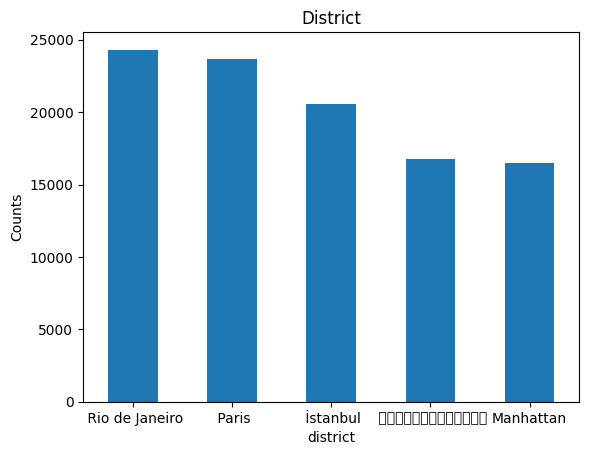

In [64]:
plt.title('District')
plt.xlabel('District')
plt.ylabel('Counts')
# plt.rcParams['font.family'] = 'Arial Unicode MS'
df_listings['district'].value_counts()[:5].plot.bar(rot=0)

plt.show()

In [65]:
# number of reviews for each city
merge_data['city'].value_counts()

city
Paris             1118382
Rome               905947
New York           846639
Sydney             477479
Mexico City        477077
Rio de Janeiro     322709
Cape Town          301987
Bangkok            261134
Istanbul           193834
Hong Kong          133488
Name: count, dtype: int64

<Axes: title={'center': 'Number of reviews for highest 5 cities'}, xlabel='city', ylabel='Number of reviews (M)'>

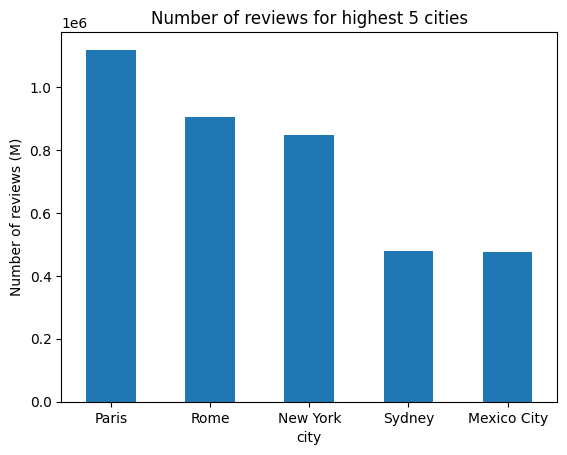

In [66]:
# number of reviews for each city
plt.title( 'Number of reviews for highest 5 cities')
plt.xlabel('Cities')
plt.ylabel('Number of reviews (M)')
merge_data['city'].value_counts()[:5].plot.bar(rot=0)

<Axes: title={'center': 'Number of reviews for each highest 5 neighborhoods'}, xlabel='neighbourhood', ylabel='Number of reviews (M)'>

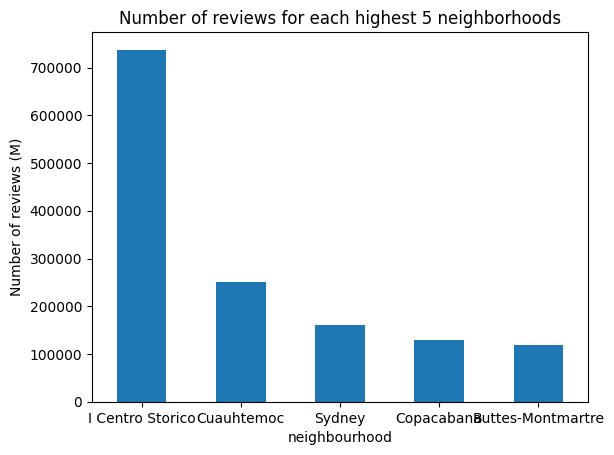

In [67]:
# number of reviews for each city
plt.title( 'Number of reviews for each highest 5 neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of reviews (M)')
merge_data['neighbourhood'].value_counts()[:5].plot.bar(rot=0)

In [68]:
merge_data['district'].value_counts()[:5]

district
 Anguillara Sabazia    737337
 Paris                 396622
Brooklyn               363394
Manhattan              311541
 Rio de Janeiro        298766
Name: count, dtype: int64

<Axes: title={'center': 'Number of reviews for each highest 5 districts'}, xlabel='district', ylabel='Number of reviews (M)'>

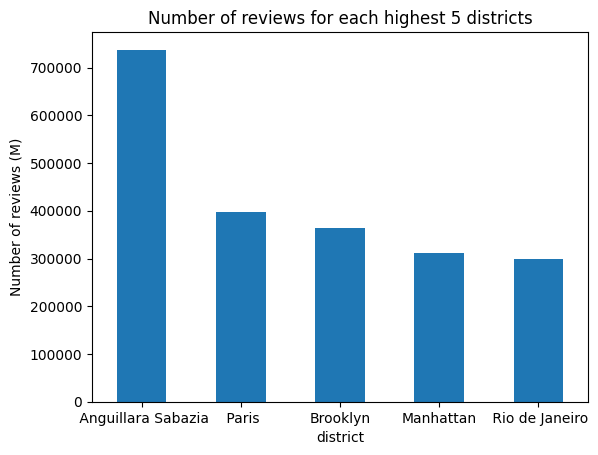

In [69]:
# number of reviews for each city
plt.title( 'Number of reviews for each highest 5 districts')
plt.xlabel('District')
plt.ylabel('Number of reviews (M)')
merge_data['district'].value_counts()[:5].plot.bar(rot=0)

### Bivariate analysis 

In [70]:
# correlation heatmap plot between numeric variables
# df_listings.corr() causing error?

# Select only numeric columns
numeric_df = df_listings.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,listing_id,host_id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,instant_bookable
listing_id,1.000000,0.582152,-0.029841,0.072561,-0.000140,0.022578,-0.002514,-0.003202,-0.006230,0.011083,0.009996,0.250235
host_id,0.582152,1.000000,-0.065888,0.015060,-0.029844,-0.124283,0.013195,0.006897,-0.015470,0.001280,0.010656,0.229525
host_is_superhost,-0.029841,-0.065888,1.000000,-0.024043,0.018398,0.136105,-0.007170,-0.071355,0.042415,-0.000558,0.008083,0.033587
host_total_listings_count,0.072561,0.015060,-0.024043,1.000000,0.004716,0.039177,-0.041397,0.062513,-0.019985,-0.005617,0.009578,0.058649
host_has_profile_pic,-0.000140,-0.029844,0.018398,0.004716,1.000000,0.047302,0.001114,-0.007137,0.004448,-0.003248,-0.007103,-0.004427
host_identity_verified,0.022578,-0.124283,0.136105,0.039177,0.047302,1.000000,0.061290,-0.036792,0.058148,0.011997,-0.008053,0.004989
latitude,-0.002514,0.013195,-0.007170,-0.041397,0.001114,0.061290,1.000000,-0.421713,-0.116410,-0.116711,-0.095396,0.005045
longitude,-0.003202,0.006897,-0.071355,0.062513,-0.007137,-0.036792,-0.421713,1.000000,0.009392,0.037778,0.016522,0.045124
accommodates,-0.006230,-0.015470,0.042415,-0.019985,0.004448,0.058148,-0.116410,0.009392,1.000000,0.593829,0.146852,0.006601
bedrooms,0.011083,0.001280,-0.000558,-0.005617,-0.003248,0.011997,-0.116711,0.037778,0.593829,1.000000,0.134543,-0.017624


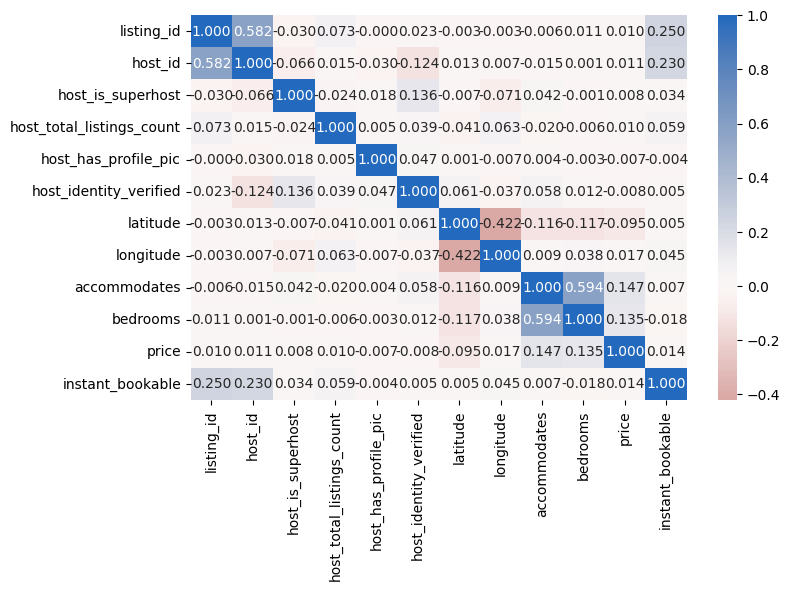

In [71]:
# correlation heatmap plot between numeric variables
plt.figure(figsize = [8, 5]) 
sb.heatmap(correlation_matrix, annot = True, fmt = '.3f',
            cmap = 'vlag_r', center = 0)
plt.show()

From the heatmap, we can get the select the columns that have highiest correlrtion with price column are.

columns:
- bedrooms
- accommodates

<Axes: xlabel='bedrooms', ylabel='price'>

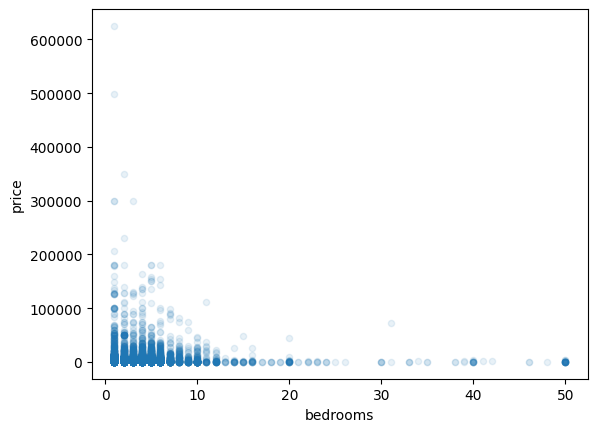

In [72]:
#
df_listings.plot(kind='scatter',x='bedrooms',y='price',alpha=0.1)

<Axes: xlabel='accommodates', ylabel='price'>

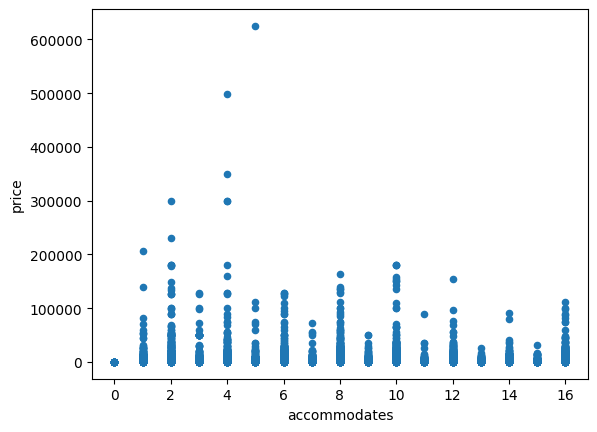

In [73]:
df_listings.plot.scatter('accommodates','price')

<Axes: xlabel='latitude', ylabel='price'>

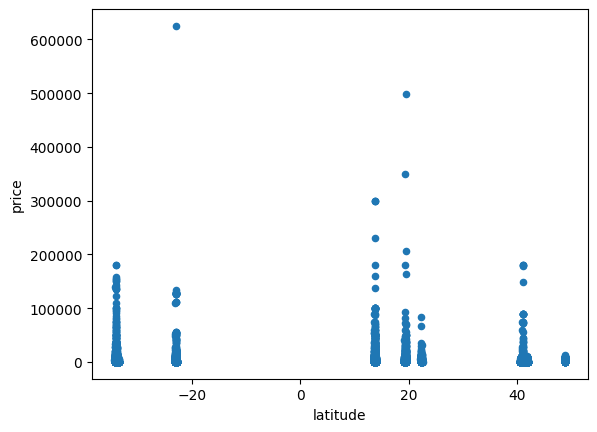

In [74]:
df_listings.plot.scatter('latitude','price')

In [75]:
df_listings.groupby(['city'])['price'].mean().reset_index().sort_values('price',ascending = False)[:5]

,city,price
1,Cape Town,2398.345816
0,Bangkok,2060.504648
4,Mexico City,1147.613487
2,Hong Kong,745.583133
7,Rio de Janeiro,739.419940


In [76]:
df_listings['city'].value_counts()[:5]

city
Paris             59845
New York          36883
Sydney            33332
Rio de Janeiro    26480
Istanbul          24407
Name: count, dtype: int64

In [77]:
# The function shows the 
def bar_chart(x,y):
    result = df_listings.groupby([x])[y].mean().reset_index().sort_values(y,ascending = False)[:5]
    fig = plt.figure(figsize = (10, 3))
 
    # creating the bar plot
    plt.bar(result[x], result[y])
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

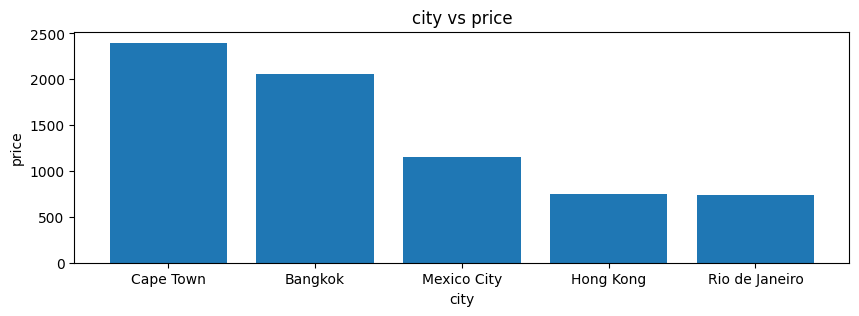

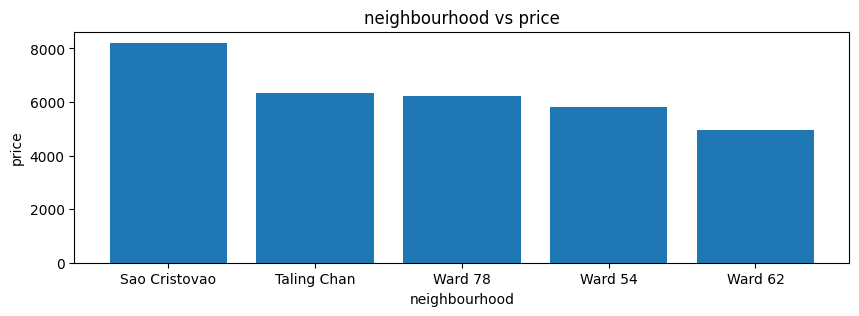

C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4bdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO R

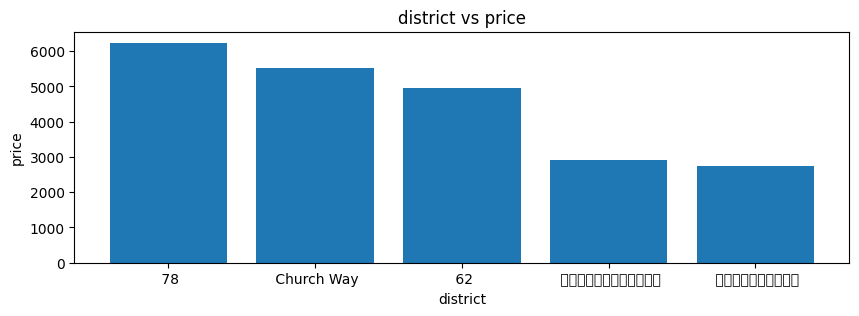

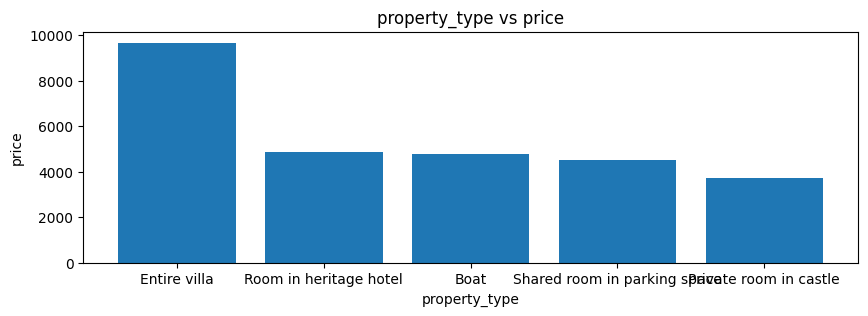

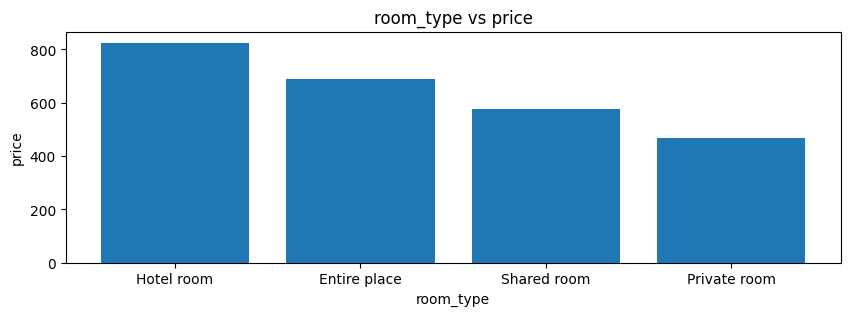

In [90]:
# barchart for the mean price value for each category
bar_chart('city','price')
bar_chart('neighbourhood','price')
bar_chart('district','price')
bar_chart('property_type','price')
bar_chart('room_type','price')

In [79]:
df_listings.describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,265029.0,26550818.869939,2595.0,13975249.0,27986987.0,39905380.0,48343530.0,14414137.580109
host_id,265029.0,109083690.977667,1822.0,17465490.0,59336807.0,185308070.0,390187445.0,111268862.329044
host_since,265029,2016-04-18 15:38:39.463907840,2008-08-12 00:00:00,2014-07-07 00:00:00,2016-02-21 00:00:00,2018-04-20 00:00:00,2021-02-26 00:00:00,NaN
host_is_superhost,265029.0,0.179958,0.0,0.0,0.0,0.0,1.0,0.384153
host_total_listings_count,265029.0,25.370767,0.0,1.0,1.0,4.0,7235.0,290.651237
host_has_profile_pic,265029.0,0.996763,0.0,1.0,1.0,1.0,1.0,0.056806
host_identity_verified,265029.0,0.720819,0.0,0.0,1.0,1.0,1.0,0.448597
latitude,265029.0,17.679663,-34.2644,-22.97018,40.6894,41.90392,48.90491,32.873712
longitude,265029.0,12.180447,-99.33963,-43.22293,2.37904,28.99575,151.33981,74.540741
accommodates,265029.0,3.285814,0.0,2.0,2.0,4.0,16.0,2.1389


In [80]:
# describe for categorical values 
df_listings.describe(include='object')

,name,host_location,neighbourhood,district,city,amenities,minimum_nights,maximum_nights
count,265029,265029,265029,265029,265029,265029,265029,265029
unique,252157,6918,646,103,10,232537,11,487
top,home away from home,"Paris, Ile-de-France, France",I Centro Storico,Rio de Janeiro,Paris,"[""Long term stays allowed""]",1,1125
freq,98,44106,14842,24312,59845,1287,87555,149570


4. **Feature Engineering:**
   - Create new features that might be useful for analysis (e.g., average rating, occupancy rate, etc.).
   - Encode categorical variables if necessary (e.g., one-hot encoding, label encoding, etc.).


In [81]:
# Calculate the length of the list in the 'amenities' columnn
df_listings['amenities_count'] = df_listings['amenities'].apply(len)
df_listings['amenities_count'].sample()


4111    134
Name: amenities_count, dtype: int64

In [82]:
number_of_reviewers = merge_data.groupby('listing_id').reviewer_id.count().to_dict()
df_listings['number_of_reviewers'] = df_listings['listing_id'].map(number_of_reviewers)
df_listings['number_of_reviewers'].fillna(0,inplace=True)

In [83]:
df_listings.head(1)

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable,amenities_count,number_of_reviewers
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",0,1,1,0,Buttes-Montmartre,Quartier des Grandes-Carrières,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,0,67,2.0


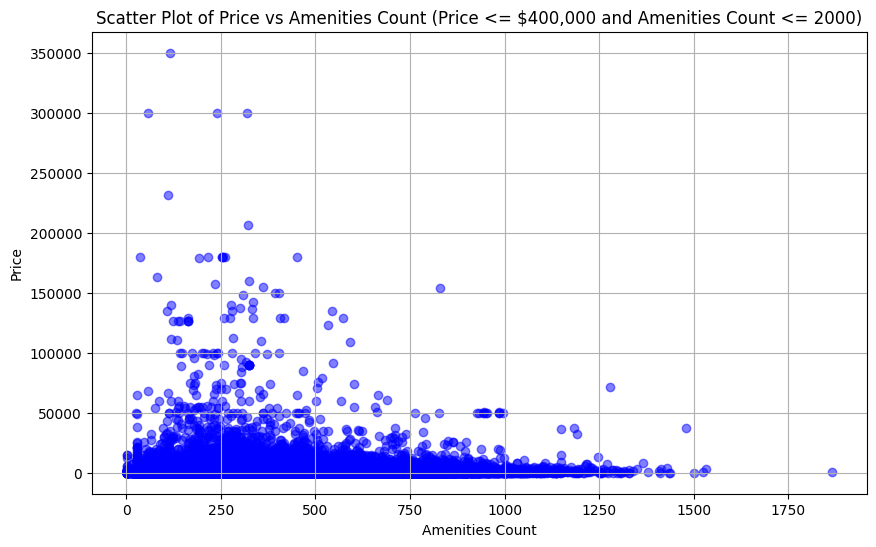

In [84]:
# Filter the DataFrame to include only listings with prices less than or equal to $400,000 and amenities count less than or equal to 2000
df_filtered = df_listings[(df_listings['price'] <= 400000) & (df_listings['amenities_count'] <= 2000)]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['amenities_count'], df_filtered['price'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Price vs Amenities Count (Price <= $400,000 and Amenities Count <= 2000)')
plt.xlabel('Amenities Count')
plt.ylabel('Price')
plt.grid(True)
plt.show()


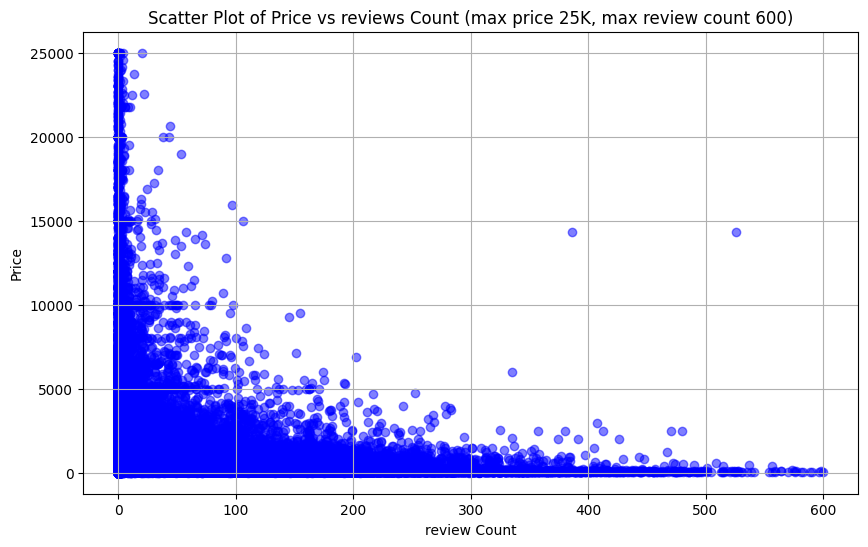

In [85]:
df_filtered = df_listings[(df_listings['price'] <= 25000) & (df_listings['number_of_reviewers'] <= 600)]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['number_of_reviewers'], df_filtered['price'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Price vs reviews Count (max price 25K, max review count 600)')
plt.xlabel('review Count')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [86]:
# cross = pd.crosstab(df_listings['city'], df_listings['property_type'], normalize=True)
# cross

# Get the top 10 unique property types
top_10_property_types = df_listings['property_type'].value_counts().head(10)

# Filter the DataFrame to include only the rows where the property type is one of the top 10 most frequent property types
df_filtered = df_listings[df_listings['property_type'].isin(top_10_property_types.index)]

# Create the cross-tabulation
cross = pd.crosstab(df_filtered['city'], df_filtered['property_type'], normalize=True)

cross


property_type,Entire apartment,Entire condominium,Entire house,Entire loft,Entire serviced apartment,Private room in apartment,Private room in bed and breakfast,Private room in condominium,Private room in house,Room in boutique hotel
city,,,,,,,,,,
Bangkok,0.020239,0.014495,0.001908,0.000346,0.001861,0.007883,0.001377,0.003708,0.003092,0.002626
Cape Town,0.027994,0.001908,0.014974,0.000924,0.001309,0.003032,0.001972,0.000133,0.007164,0.000693
Hong Kong,0.007305,0.001540,0.000312,0.000094,0.001172,0.009820,0.000458,0.001228,0.000385,0.000569
Istanbul,0.035821,0.001989,0.003409,0.000997,0.005928,0.023464,0.002494,0.001463,0.003003,0.006707
Mexico City,0.031920,0.003623,0.002288,0.004286,0.000817,0.018819,0.000586,0.002245,0.010308,0.000979
New York,0.066069,0.004204,0.004050,0.002669,0.001287,0.051287,0.000150,0.002027,0.008101,0.001437
Paris,0.204049,0.007258,0.001377,0.004145,0.000706,0.021732,0.000565,0.001275,0.000445,0.007160
Rio de Janeiro,0.065273,0.005376,0.004850,0.002335,0.002532,0.017690,0.000646,0.001959,0.005261,0.000171
Rome,0.046882,0.003131,0.001570,0.002010,0.000595,0.012322,0.006561,0.002275,0.000808,0.002348


<Axes: xlabel='property_type', ylabel='city'>

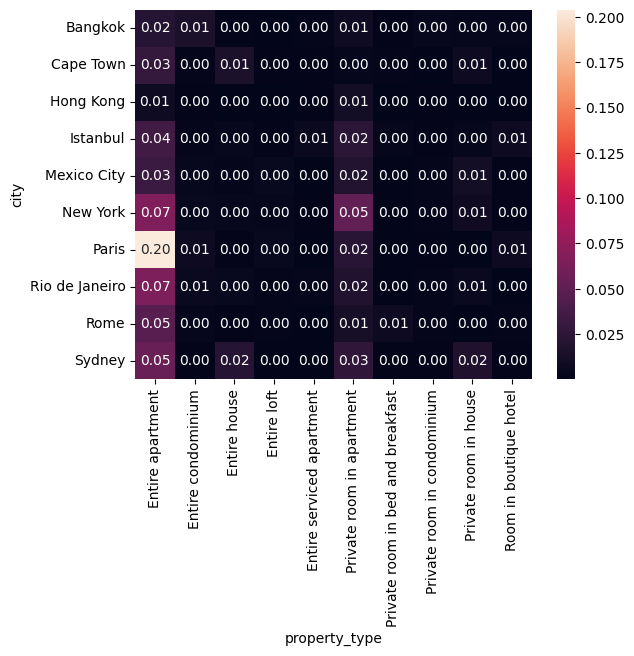

In [87]:
sb.heatmap(cross, annot=True, fmt=".02f")

# conclusion


`Bedrooms` and `Price`

- there is a weak connection between bedroom and prices.
- We noticed the most of bedrooms are between 0 to 10 and their pricees less then 100000$


`City` and `Price`

- cape Town has the highest average price of accommodation by almost 2500$, Bangokok cames after by more than 2000 and the average price of Mexico city is more then 1000$, in the end of the highest 5 city are Hong kong and Rio de janeiro both of them most likely 750$

`Property type` and `Price`

- The highest 5 price by property types are (Entire villa , Room in heritage hotel, Boat, Shared room in parking space, private room in astle).

- The average price for Entire villa is almost 10K and The average price for ( Room in heritage hotel, Boat, Shared room in parking space, private room in astle) are half of this number.

`Room type` and `Price`

- The highest room type price is Hotel room with average price 800$ after that Entire place cames with maybe 700$.
- Shared room cames third with average price 600$ and in the last one is private room with 500$. 



`Amenities Count` and `Price`

- No strong link between the number of amenities and listing prices.
- We noticed listings with amenities counts between 100 and 250 tend to have higher prices.
- While amenities matter, they alone don't determine prices.

`Review Count` and `Price`

- No clear connection between review count and listing prices.
- Listings with different review counts can have different prices.
- Lots of reviews don't always mean higher prices.